# Tutorial 1: Atomic crystal module in PyXtal

Source code: https://github.com/qzhu2017/PyXtal

Created by Qiang Zhu (2020/11/23)

Last updated: 2022/08/11

More details can be found at the following [link](https://pyxtal.readthedocs.io/en/latest/)

# 1.1 Generate a random atomic crystal

In [1]:
from pyxtal import pyxtal

In [2]:
C1 = pyxtal()
C1.from_random(3, 227, ['C'], [8])
# Alternative, you can also generate the structure with pre-assigned sites
# C1.from_random(3, 225, ["C"], [12], sites=[["4a", "8c"]])

print(C1)


------Crystal from random------
Dimension: 3
Composition: C8
Group: F d -3 m:2 (227)
  4.5200,   4.5200,   4.5200,  90.0000,  90.0000,  90.0000, cubic
Wyckoff sites:
	 C @ [ 0.1250  0.1250  0.1250], WP [8a] Site [-433mm]


In [3]:
C1.atom_sites[0].wp

Wyckoff position 8a in space group 227 with site symmetry -4 33 mm
1/8, 1/8, 1/8
7/8, 3/8, 3/8
1/8, 5/8, 5/8
7/8, 7/8, 7/8
5/8, 1/8, 5/8
11/8, 3/8, 7/8
5/8, 5/8, 1/8
11/8, 7/8, 3/8

In [4]:
#display the structure can be easily accessed with the show() function
C1.show(supercell=(2,2,1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# 1.2 Manipulating the crystal via symmetry relation

In [5]:
# lower the symmetry from cubic to tetragonal
C2 = C1.subgroup_once(H=141, eps=1e-2)
print(C2)


------Crystal from subgroup------
Dimension: 3
Composition: C8
Group: I 41/a m d:2 (141)
  3.1961,   3.1961,   4.5134,  90.0000,  90.0000,  90.0000, tetragonal
Wyckoff sites:
	 C @ [ 0.0000  0.7500  0.1250], WP [4a] Site [-4mm2]


In [6]:
# Compute the XRD
xrd1 = C1.get_XRD()
xrd2 = C2.get_XRD()


The similarity between two PXRDs is 0.9986


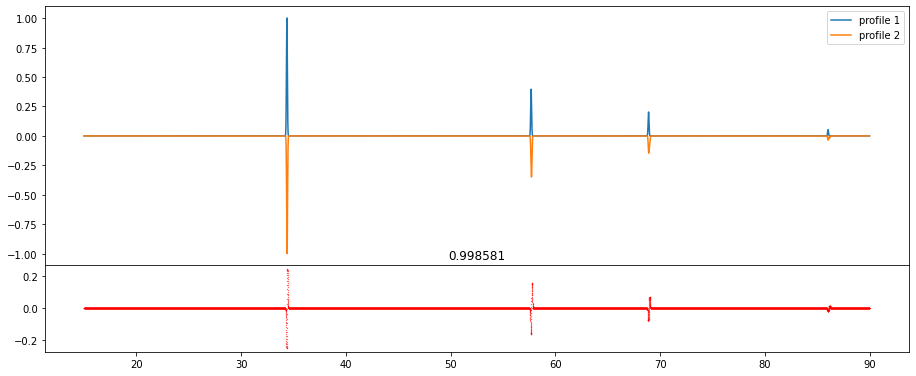

In [7]:
# Compare two structures by XRD
from pyxtal.XRD import Similarity
p1 = xrd1.get_profile()
p2 = xrd2.get_profile()
s = Similarity(p1, p2, x_range=[15, 90])
print(s)
s.show()

# 1.3 Chemical substitution via symmetry relation

In [8]:
#play substitution
permutation = {"C":"Si"}
SiC = C1.subgroup_once(eps=0.01, H=None, perms=permutation)
print(C1)
print(SiC)
SiC.show(supercell=(2,2,2))


------Crystal from random------
Dimension: 3
Composition: C8
Group: F d -3 m:2 (227)
  4.5200,   4.5200,   4.5200,  90.0000,  90.0000,  90.0000, cubic
Wyckoff sites:
	 C @ [ 0.1250  0.1250  0.1250], WP [8a] Site [-433mm]

------Crystal from subgroup------
Dimension: 3
Composition: Si3C3
Group: R 3:H (146)
  3.1961,   3.1961,   7.7923,  90.0000,  90.0000, 120.0000, hexagonal
Wyckoff sites:
	 C @ [ 0.0000  0.0000  0.1245], WP [3a] Site [3..]
	Si @ [ 0.0000  0.0000  0.8764], WP [3a] Site [3..]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# 1.4 Supergroup symmetry

In [9]:
# load the experimental alpha-quartz structure from the cif file

lt_sio2 = pyxtal()
lt_sio2.from_seed('lt_quartz.cif')
print(lt_sio2)
lt_sio2.show()


------Crystal from Seed------
Dimension: 3
Composition: Si3O6
Group: P 32 2 1 (154)
  5.0278,   5.0278,   5.5189,  90.0000,  90.0000, 120.0000, hexagonal
Wyckoff sites:
	Si @ [ 0.4773  0.0000  0.6667], WP [3a] Site [.2.]
	 O @ [ 0.1607  0.7457  0.5373], WP [6c] Site [1]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
# Here we search for the high temperature phase

ht_sio2, _ = lt_sio2.supergroup(G=180)
print(len(ht_sio2), 'structures have been generated')
print(ht_sio2[-1])
ht_sio2[-1].show()

5 structures have been generated

------Crystal from supergroup  0.847------
Dimension: 3
Composition: Si3O6
Group: P 62 2 2 (180)
  5.0278,   5.0278,   5.5189,  90.0000,  90.0000, 120.0000, hexagonal
Wyckoff sites:
	Si @ [ 0.5000  0.0000  0.0000], WP [3c] Site [222.]
	 O @ [ 0.5000  0.0000  0.7923], WP [6f] Site [2..]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# 1.5 Exporting the structure

In [11]:
#In general, you can export the structure in several ways

# CIF/POSCAR file
C1.to_file('1.cif')
C1.to_ase().write('1.vasp', format='vasp', vasp5=True)

# ASE's atoms object
ase_struc = C1.to_ase()
print(ase_struc)

# Pymatgen object
pmg_struc = C1.to_pymatgen()
print(pmg_struc)

Atoms(symbols='C8', pbc=True, cell=[[4.520029655601712, 2.7677199248918747e-16, 2.7677199248918747e-16], [0.0, 4.520029655601712, 2.7677199248918747e-16], [0.0, 0.0, 4.520029655601712]])
Full Formula (C8)
Reduced Formula: C
abc   :   4.520030   4.520030   4.520030
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  C     0.125  0.125  0.125
  1  C     0.875  0.375  0.375
  2  C     0.125  0.625  0.625
  3  C     0.875  0.875  0.875
  4  C     0.625  0.125  0.625
  5  C     1.375  0.375  0.875
  6  C     0.625  0.625  0.125
  7  C     1.375  0.875  0.375


# 1.6 Low dimensional systems

In [12]:
# An example to generate 2D atomic crystal
C3 = pyxtal()
C3.from_random(2, 75, ['C'], [6], thickness=0.0)
C3.show(scale=0.2)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [13]:
# An example to generate 0D atomic cluster
C4 = pyxtal()
C4.from_random(0, 'Ih', ['C'], [60])
C4.show(scale=0.2)

*** Open Babel Error  in LoadAllPlugins
  Unable to find OpenBabel plugins. Try setting the BABEL_LIBDIR environment variable.


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
# to improve the quality, you can increase the minimum distance
C4.from_random(0, 'Ih', ['C'], [60], t_factor=1.2)
C4.show(scale=0.1, radius=0.01)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol